<a href="https://colab.research.google.com/github/tanujkhatri24-max/website_analysis-pyhton-panda-matplotlib-seaborn/blob/main/Website_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np  #for mathatical calulation
import pandas as pd    #for data clealing & reading
import matplotlib.pyplot as plt    #for visualization
import seaborn as sns     #fro visualization

In [ ]:
df = pd.read_csv("dataort (1).csv")
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [ ]:
df.columns = df.iloc[0]
df = df.drop(index = 0).reset_index(drop = True)
df.columns = ["channel group", "DateHour", "users", "Sessions", "Engaged Sessions", "Avergae engagement time per session", "Event Session per user", "Event per session", "Engagement rate", "Event count"]
df.head()

,channel group,DateHour,users,Sessions,Engaged Sessions,Avergae engagement time per session,Event Session per user,Event per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [ ]:
df["DateHour"] = pd.to_datetime(df["DateHour"], format = "%Y%m%d%H", errors = 'coerce')  #change object to datetime format.
df.head()


,channel group,DateHour,users,Sessions,Engaged Sessions,Avergae engagement time per session,Event Session per user,Event per session,Engagement rate,Event count
0,Direct,2024-04-16 23:00:00,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024-04-17 23:00:00,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [ ]:
numeric_cols = df.columns.drop(["channel group", "DateHour"])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric,errors= 'coerce')  #changing into numeric columns.
df["Hour"] = df["DateHour"].dt.hour     #make saperate column for Hour.
df.head()

,channel group,DateHour,users,Sessions,Engaged Sessions,Avergae engagement time per session,Event Session per user,Event per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [ ]:
df.info()  #now dataset properly cleaned in format.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel group                        3182 non-null   object        
 1   DateHour                             3182 non-null   datetime64[ns]
 2   users                                3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engaged Sessions                     3182 non-null   int64         
 5   Avergae engagement time per session  3182 non-null   float64       
 6   Event Session per user               3182 non-null   float64       
 7   Event per session                    3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
 10  Hour        

In [ ]:
df.describe()    #it will tell basic staticstic.

,DateHour,users,Sessions,Engaged Sessions,Avergae engagement time per session,Event Session per user,Event per session,Engagement rate,Event count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


#1. website sessions and user over time

In [ ]:
sns.set(style="whitegrid")  #set seaborn library

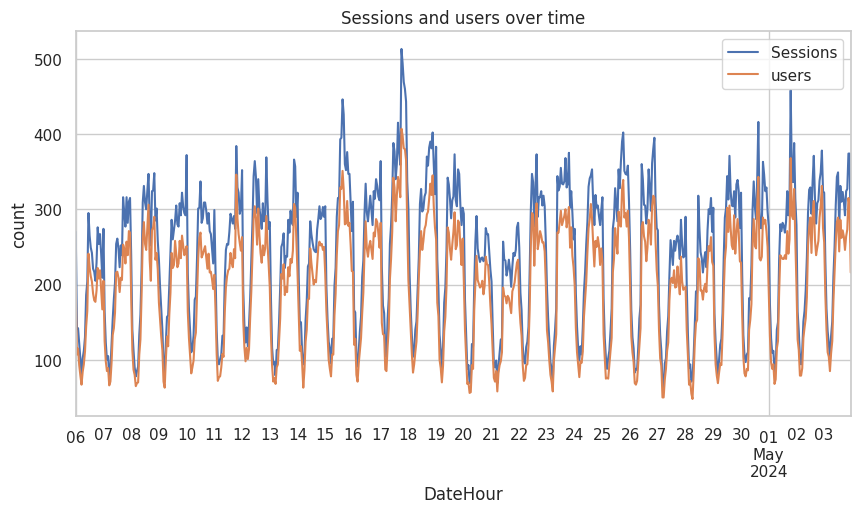

In [ ]:
plt.figure(figsize=(10,5))
df.groupby("DateHour")[["Sessions","users"]].sum().plot(ax=plt.gca())
plt.title("Sessions and users over time")
plt.xlabel("DateHour")
plt.ylabel("count")
plt.show()


#2. total users by channel

/tmp/ipython-input-2294544455.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="channel group", y="users", estimator=np.sum, palette="Blues")


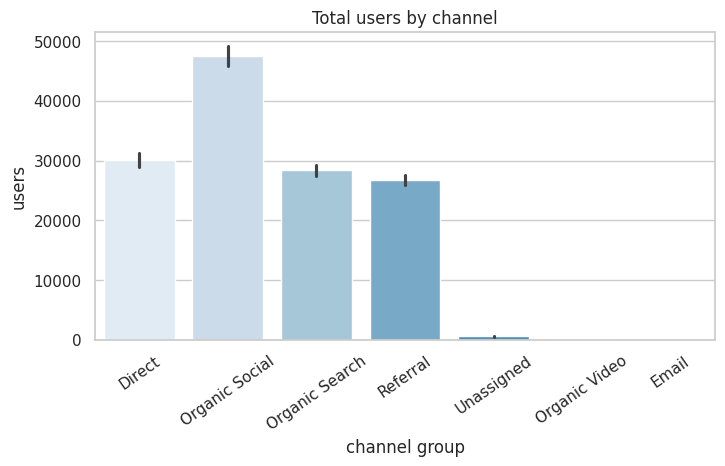

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x="channel group", y="users", estimator=np.sum, palette="Blues")
plt.title("Total users by channel")
plt.xticks(rotation=35)
plt.show()

#3. Average engagenment time by channel

/tmp/ipython-input-3657413695.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="channel group", y="Avergae engagement time per session", estimator=np.mean, palette=("magma"))


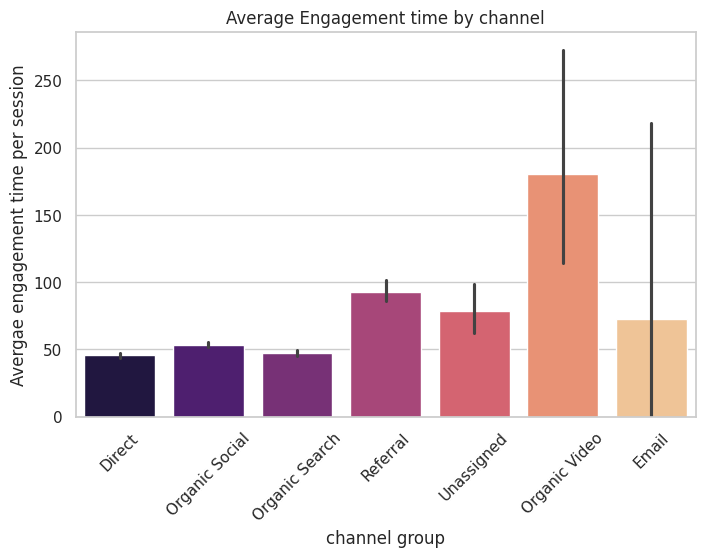

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="channel group", y="Avergae engagement time per session", estimator=np.mean, palette=("magma"))
plt.title("Average Engagement time by channel")
plt.xticks(rotation=45)
plt.show()

#4Engaged vs non engaged session.

In [ ]:
df.head()

,channel group,DateHour,users,Sessions,Engaged Sessions,Avergae engagement time per session,Event Session per user,Event per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


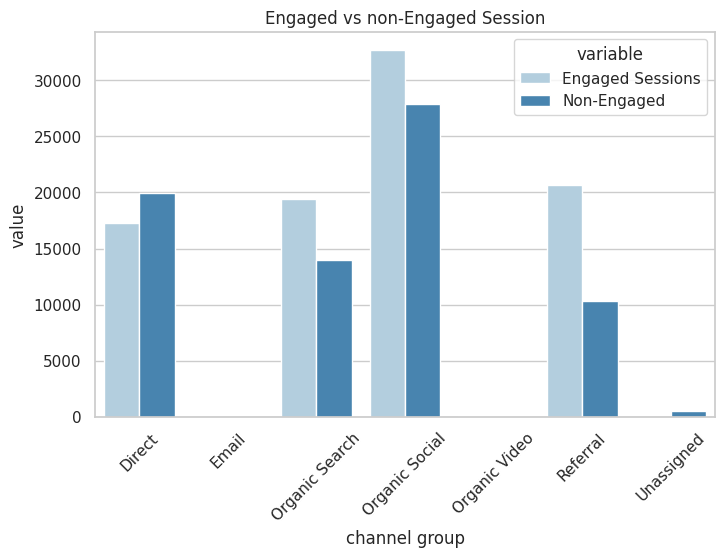

In [ ]:
#for calulating non-engaged session( total- Engaged session)
session_df = df.groupby("channel group")[["Sessions", "Engaged Sessions"]].sum().reset_index()
session_df["Non-Engaged"] = session_df["Sessions"] - session_df["Engaged Sessions"]
session_df_method = session_df.melt(id_vars = "channel group", value_vars = ["Engaged Sessions", "Non-Engaged"])

plt.figure(figsize=(8, 5))
sns.barplot(data=session_df_method, x="channel group", y="value",hue="variable", palette=("Blues"))
plt.title("Engaged vs non-Engaged Session")
plt.xticks(rotation=45)
plt.show()

#5.traffic by Hour and channel

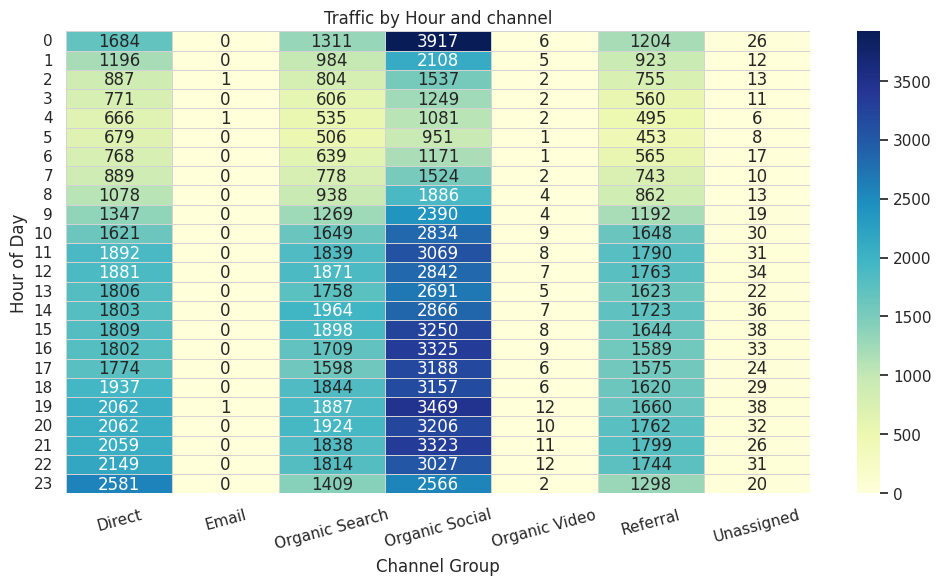

In [ ]:
heatmap_data = df.groupby(["Hour", "channel group"])["Sessions"].sum().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5, linecolor='lightgray', annot=True, fmt='.0f')
plt.title("Traffic by Hour and channel")
plt.xlabel("Channel Group")
plt.ylabel("Hour of Day")
plt.xticks(rotation=15)
plt.show()

#6. correlation b/w

In [ ]:
# Correlation B/W high traffic(sessions) nd hight engagement rate .
df.head()

,channel group,DateHour,users,Sessions,Engaged Sessions,Avergae engagement time per session,Event Session per user,Event per session,Engagement rate,Event count,Hour,non-engaged session
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23,156
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19,135
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23,118
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18,131
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20,109


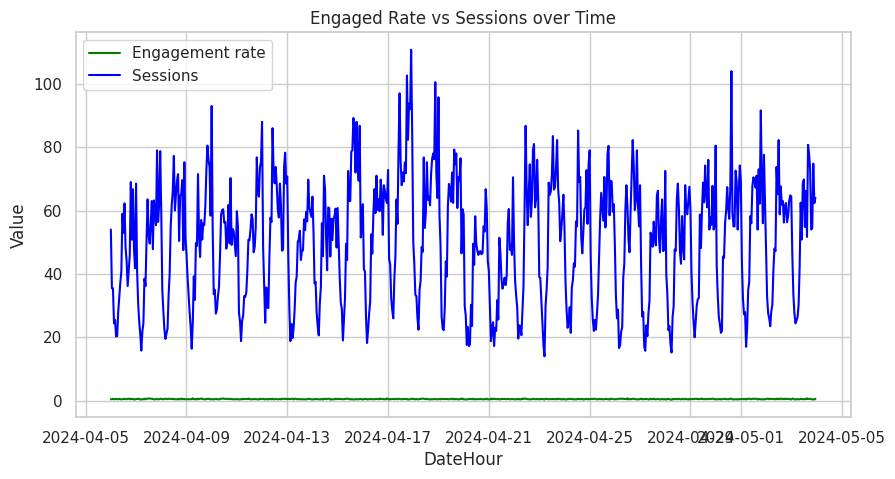

In [ ]:
# Correlation B/W high traffic(sessions) nd hight engagement rate .
df_plot = df.groupby("DateHour")[["Engagement rate", "Sessions"]].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(df_plot["DateHour"], df_plot["Engagement rate"], label="Engagement rate", color="Green")
plt.plot(df_plot["DateHour"], df_plot["Sessions"], label="Sessions", color="blue")
plt.title("Engaged Rate vs Sessions over Time")
plt.xlabel("DateHour")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()